## PROJECT 1

### Project : Holiday weather
There is nothing I like better than taking a holiday. In this project I am going to use the historic weather data from the Weather Underground for Cape Town  to try to predict two good weather weeks to take off as holiday. Of course the weather in the summer of 2016 may be very different to 2014 but it should give some indication of when would be a good time to take a summer break.

#### Getting the data; I am loading the Cape Town csv data file.

In [75]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

import pandas as pd

from datetime import datetime 

In [76]:
Cape_Town = pd.read_csv('CapeTown_CPT_2014.csv', skipinitialspace=True)
Cape_Town.head()

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees<br />
0,2014-1-1,28,23,18,19,17,15,88,71,45,...,19.0,14.0,10.0,35,14,NaN,0.0,2.0,NaN,213<br />
1,2014-1-2,28,23,18,19,18,16,88,74,46,...,26.0,13.0,10.0,32,21,NaN,0.0,2.0,NaN,204<br />
2,2014-1-3,27,23,19,19,18,18,94,75,48,...,31.0,12.0,3.0,32,26,NaN,0.0,4.0,NaN,193<br />
3,2014-1-4,27,22,18,19,18,14,88,74,46,...,26.0,13.0,9.0,32,18,NaN,0.0,3.0,NaN,314<br />
4,2014-1-5,26,22,18,17,16,14,83,70,46,...,26.0,13.0,10.0,45,21,NaN,0.0,4.0,Rain,25<br />


#### Cleaning the data

In [77]:
#I would be using the 'WindDirDegrees' in my analysis, I am renaming 'WindDirDegrees< br />' to 'WindDirDegrees'

In [78]:
Cape_Town = Cape_Town.rename(columns={'WindDirDegrees<br />' : 'WindDirDegrees'})


In [79]:
#this code would remove the < br /> html line breaks from the values in the 'WindDirDegrees' column

Cape_Town['WindDirDegrees'] = Cape_Town['WindDirDegrees'].str.rstrip('<br />')



In [80]:
#This code will change the values in the 'WindDirDegrees' column to float64

Cape_Town['WindDirDegrees'] = Cape_Town['WindDirDegrees'].astype('float64') 

In [81]:
# This code will change the values in the 'GMT' column into values of the datetime64 date type
Cape_Town['Date'] = pd.to_datetime(Cape_Town['Date'])

In [82]:
Cape_Town.index = Cape_Town['Date']

## Finding a summer break

According to meteorologists, summer extends for the whole months of June, July, and August in the northern hemisphere and the whole months of December, January, and February in the southern hemisphere. Since I'm in the southern hemisphere I'm going to create a dataframe that can speak to the data without neccessarily cutting into 2015 since the data is for 2014 record.using the `datetime` index, I would need to create a complex form of dataframe as follows:

In [110]:
summer1 = Cape_Town.loc[datetime(2014,12,1) : datetime(2014,12,31)]
summer2 = Cape_Town.loc[datetime(2014,1,1) : datetime(2014,2,28)]

In [111]:
summer = summer2.append(summer1)

checking for the days with warm temperatures

In [112]:
summer[summer['Mean TemperatureC'] >= 25]

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-21,2014-01-21,31,25,19,18,16,14,78,58,31,...,10.0,10.0,10.0,35,24,45.0,0.0,1.0,NaN,207.0
2014-01-30,2014-01-30,31,26,21,19,17,15,73,59,40,...,31.0,13.0,10.0,37,27,NaN,0.0,1.0,NaN,169.0
2014-01-31,2014-01-31,35,28,20,20,18,15,73,56,28,...,10.0,10.0,10.0,24,13,NaN,0.0,1.0,NaN,205.0
2014-02-14,2014-02-14,33,26,19,20,18,15,83,60,36,...,31.0,14.0,10.0,35,21,NaN,0.0,1.0,NaN,172.0
2014-02-15,2014-02-15,33,28,22,21,19,18,78,64,36,...,26.0,16.0,10.0,34,16,NaN,0.0,1.0,NaN,195.0
2014-02-16,2014-02-16,36,28,20,21,19,17,83,61,38,...,31.0,22.0,10.0,29,18,NaN,0.0,1.0,NaN,202.0
2014-02-17,2014-02-17,29,26,22,21,19,16,88,69,39,...,31.0,14.0,9.0,34,13,NaN,0.0,4.0,NaN,205.0
2014-02-18,2014-02-18,31,27,22,21,20,18,94,68,43,...,31.0,12.0,10.0,42,31,NaN,0.0,1.0,NaN,174.0
2014-02-25,2014-02-25,33,26,19,17,16,14,73,55,30,...,31.0,14.0,10.0,40,26,NaN,0.0,1.0,NaN,158.0


Summer 2014 is okay in Cape Town: for all the days the mean temperatures are 25 Celsius or higher.I Would like to visualize this better with a graph.


In [113]:
%matplotlib inline

<AxesSubplot:xlabel='Date'>

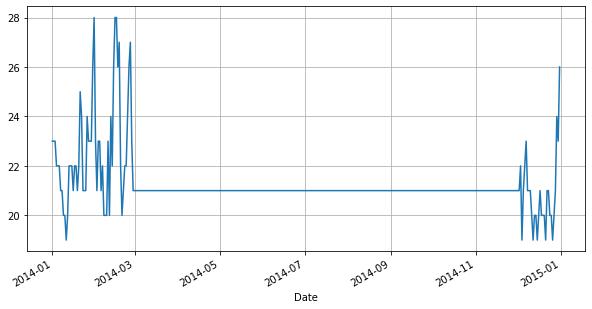

In [114]:
summer['Mean TemperatureC'].plot(grid=True, figsize=(10,5))

looking at the graph,it is clear that all the months in summer looks good for mean temperatures over 20 degrees celcius.

<AxesSubplot:xlabel='Date'>

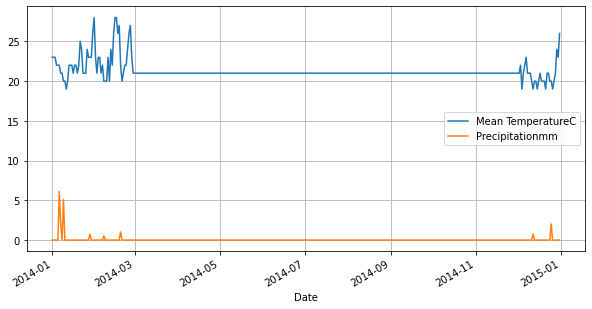

In [115]:
summer[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))

Jan 2014, feb 2014, dec 2014 are good months for vacation there is 0.0 precipitation for the months..

<AxesSubplot:xlabel='Date'>

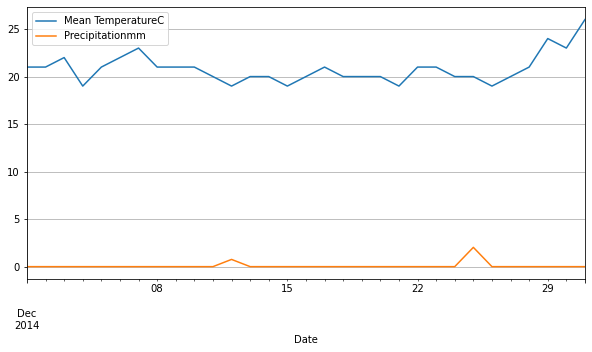

In [116]:
dec = summer.loc[datetime(2014,12,1) : datetime(2014,12,31)]
dec[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))

The graphs shows that summer is more favourable in the south hemisphere and Cape Town summer is okay, There was no record of precipation in the summer of those months recorded 2014. Of course this is no guarantee that the weather pattern will repeat itself in future years.But continous record process can help us to predict what the weather of subsequent years are likely to be over a period of time.